In [1]:
import numpy as np   # Importo paquete de álgebra lineal
import matplotlib.pyplot as plt   # Importo paquete de gráficos
import mef
from scipy import linalg
plt.rc('figure', figsize=(15,8))   # Para gráficos
plt.rc('font',size=22)             # Para gráficos

In [2]:
rho = 7850  
L_Total = 1  
Ei = 210e9  
Ai = 10/(100**2)
I = 10/(100**4) 

In [3]:
Ne = 100
glxn = 2
dimension_elementos = 1

In [4]:
L = L_Total/Ne
MN = np.array([(i*L, (i+1)*L) for i in range(Ne+1)])
MC = np.array([[i, i+1] for i in range(Ne)])
Nn = MN.shape[0]
Nnxe = MC.shape[1]
E = np.zeros([Ne])
A = np.zeros([Ne])
for e in range(Ne):
    E[e] = Ei
    A[e] = Ai

In [5]:
Ke = {}
for e in range(Ne):
    Ke[e] = (E[e]*I/L**3)*np.array([[12,6*L,-12,6*L],
                           [6*L,4*(L**2),-6*L,2*(L**2)],
                           [-12,-6*L,12,-6*L],
                           [6*L,2*(L**2),-6*L,4*(L**2)]])
def M_global(Me,Nn,Ne,glxn):   
    M = np.zeros([glxn*Nn,glxn*Nn])
    for e in range(Ne):
        for i in range(Nnxe):
            rangoi = np.linspace(i*glxn,(i+1)*glxn-1,glxn).astype(int)
            rangoni = np.linspace(MC[e,i]*glxn,(MC[e, i]+1)*glxn-1,glxn).astype(int)
            for j in range(Nnxe):
                rangoj = np.linspace(j*glxn,(j+1)*glxn-1,glxn).astype(int)
                rangonj = np.linspace(MC[e,j]*glxn,(MC[e, j]+1)*glxn-1,glxn).astype(int)
                M[np.ix_(rangoni,rangonj)] += Me[e][np.ix_(rangoi,rangoj)]
    return M
Kg = M_global(Ke, Nn, Ne, glxn)

In [6]:
Me = {}
for e in range(Ne):
    Me[e] = (rho*A[e]*L/420)*np.array([[156,22*L,54,-13*L],
                           [22*L,4*L**2,13*L,-3*L**2],
                           [54,13*L,156,-22*L],
                           [-13*L,-3*L**2,-22*L,4*L**2]])
Mg = M_global(Me, Nn, Ne, glxn)
s = np.array([0,1])
r = np.array([i for i in range(glxn*MN.shape[0]) if i not in s])

In [7]:
om_2, V = linalg.eigh(Kg[np.ix_(r,r)],Mg[np.ix_(r,r)])
f = np.sqrt(om_2)/(2*np.pi)
V = np.vstack((np.zeros([2,V.shape[1]]),V))
desp = V[0::2, :]/V[0::2, :][-1, :]

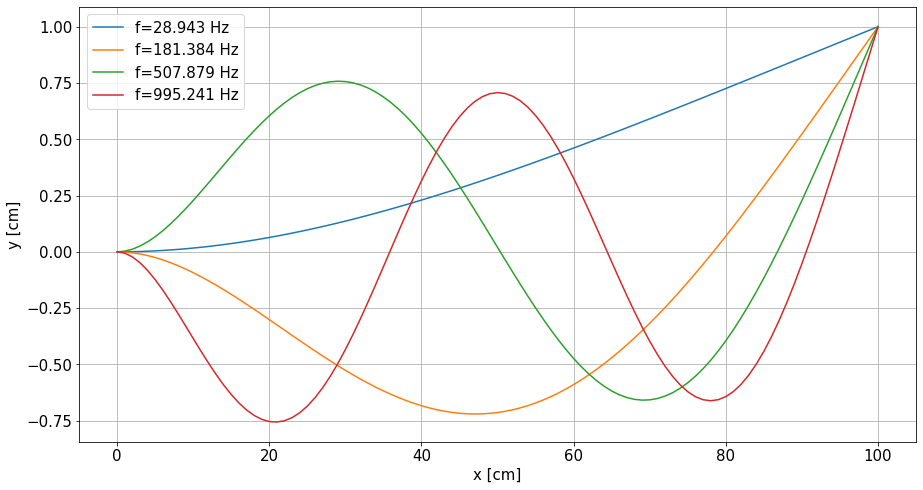

In [8]:
x = np.linspace(0,L_Total,Nn)
plt.rc('figure', figsize=(15, 8))
plt.rc('font', size=15)
for i in range(4):
    plt.plot(x*100, desp[:,i], label='f='+str(round(f[i], 3))+' Hz')
plt.grid()
plt.ylabel('y [cm]')
plt.xlabel('x [cm]')
plt.legend()
plt.show()

In [9]:
Me_0 = {}
for e in range(Ne):
    Me_0[e] = (rho*A[e]*L/24)*np.array([[12,0,0,0],
                           [0,L**2,0,0],
                           [0,0,12,0],
                           [0,0,0,L**2]])
    
M_0 = M_global(Me_0, Nn, Ne, glxn) 

In [10]:
om_2_0, V_0 = linalg.eigh(Kg[np.ix_(r,r)],M_0[np.ix_(r,r)])
f_0 = np.sqrt(om_2_0)/(2*np.pi)
V_0 = np.vstack((np.zeros([2,V_0.shape[1]]),V_0))
desp_0 = V_0[0::2, :]/V_0[0::2, :][-1, :]

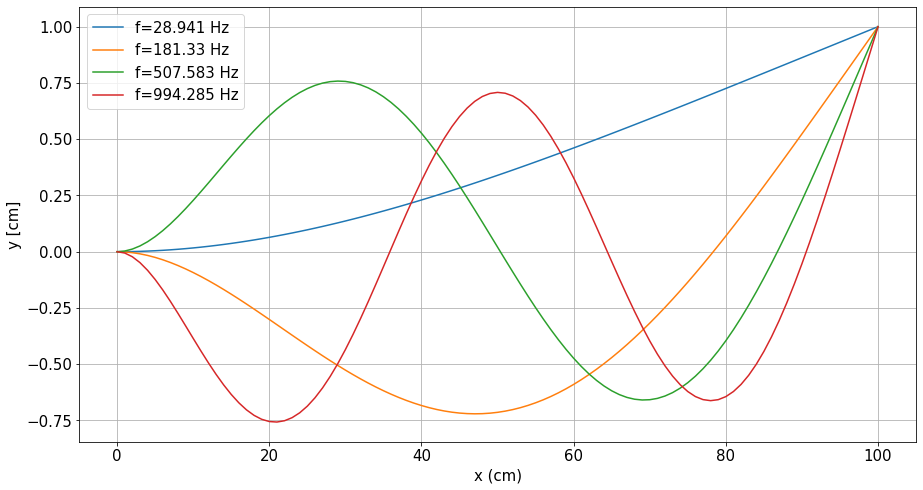

In [11]:
plt.rc('figure', figsize=(15, 8))
plt.rc('font', size=15)
for i in range(4):
    plt.plot(x*100, desp_0[:,i], label='f='+str(round(f_0[i], 3))+' Hz')
plt.grid()
plt.ylabel('y [cm]')
plt.xlabel('x (cm)')
plt.legend()
plt.show()